# Start

Import libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics, linear_model
from matplotlib import pyplot
from collections import Counter

Read the phishing dataset then 
set the X (email text) and y (label) variables

In [2]:
df = pd.read_csv('completeSpamAssassin.csv')

X = df['Body'].fillna(' ')
y = df['Label']

Display bar graph of average length of spam and ham emails

Spam Average Length: 1717 characters
Ham Average Length: 1565 characters


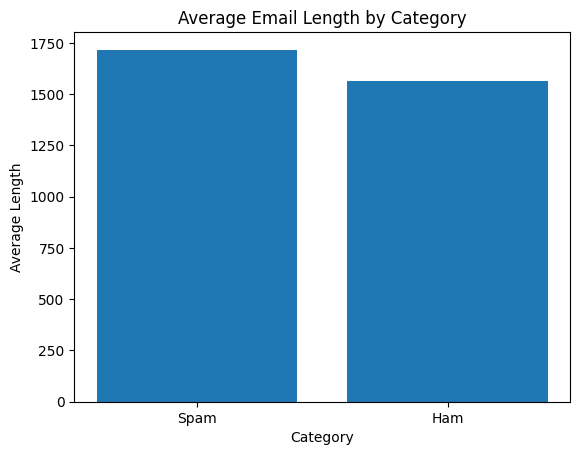

In [3]:
#Show average length of spam and ham emails
spamcount = 0
spamlength = 0
hamcount = 0
hamlength = 0

matrix = []
for index, record in df.iterrows():
    length = len(str(record['Body']))
    if length > 50000 or length < 1:
            continue
    if record['Label'] == 1:        
        spamcount += 1
        spamlength += length
        matrix.append({
            "type": "spam",
            "length": length
        })
    else:
        hamcount += 1
        hamlength += length
        matrix.append({
            "type": "ham",
            "length": length
        })
spamAverageLength = int(spamlength/spamcount)
hamAverageLength = int(hamlength/hamcount)
print(f"Spam Average Length: {spamAverageLength} characters")
print(f"Ham Average Length: {hamAverageLength} characters")
data = {
    'Spam': spamAverageLength, 
    'Ham': hamAverageLength
}
pyplot.bar(list(data.keys()), list(data.values()))
pyplot.title('Average Email Length by Category')
pyplot.xlabel('Category')
pyplot.ylabel('Average Length')
pyplot.show()

Train the model using 20% of the training data. The remaining data will be used to measure accuracy.

In [4]:
x_train, x_test,y_train, y_test = train_test_split(X,y,train_size=0.2,test_size = 0.8)

cv = CountVectorizer()
features = cv.fit_transform(x_train)

model = linear_model.LogisticRegression()
model.fit(features, y_train)

LogisticRegression()

Gather a wordlist for spam and ham emails.

In [5]:
spamWordlist = []
hamWordlist = []
for record in df.iterrows():
    if record[1]['Label'] == 1:
        spamWordlist.extend(str(record[1]['Body']).split())
    else:  
        hamWordlist.extend(str(record[1]['Body']).split())

spamCounts = Counter(spamWordlist)
hamCounts = Counter(hamWordlist)   

resultCounts = {}
for word,spamCount in spamCounts.items():
    word = word.lower()
    if len(word) <= 3:
        continue
    adjustedCount = spamCount - hamCounts.get(word,0)
    if adjustedCount > 0:
        resultCounts[word] = adjustedCount

sortedSpamWordOccurrences = dict(sorted(resultCounts.items(),key=lambda item: item[1],reverse=True)[:10])

resultCounts = {}
for word,hamCount in hamCounts.items():
    word = word.lower()
    if len(word) <= 3:
        continue
    adjustedCount = hamCount - spamCounts.get(word,0)
    if adjustedCount > 0:
        resultCounts[word] = adjustedCount

sortedHamWordOccurrences = dict(sorted(resultCounts.items(),key=lambda item: item[1],reverse=True)[:10])


Display a graphic for unique word occurences. The words are first filtered by length so that words like _a, but, and, the, for_ are excluded. The lists of words are then compared and words that occur in both are removed to give a better idea of differences of language used in spam vs ham emails.

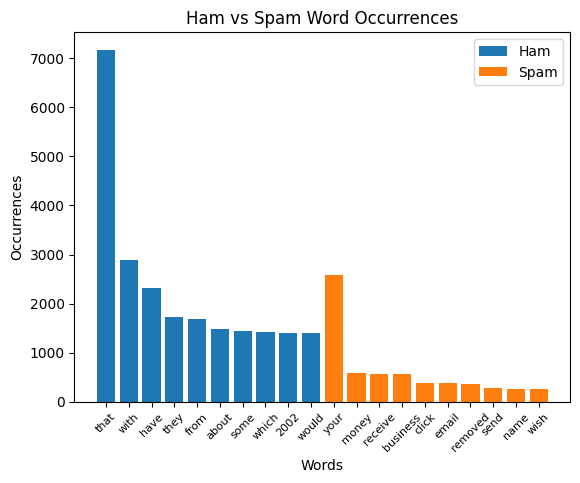

In [6]:
pyplot.title('Ham vs Spam Word Occurrences')
pyplot.xlabel('Words')
pyplot.ylabel('Occurrences')
pyplot.bar(list(sortedHamWordOccurrences.keys()), list(sortedHamWordOccurrences.values()))
pyplot.bar(list(sortedSpamWordOccurrences.keys()), list(sortedSpamWordOccurrences.values()))
pyplot.tick_params(axis='x', which='major', labelsize=8, labelrotation=45)
pyplot.legend(['Ham','Spam'],loc='upper right')
pyplot.show()

Confusion Matrix of accuracy

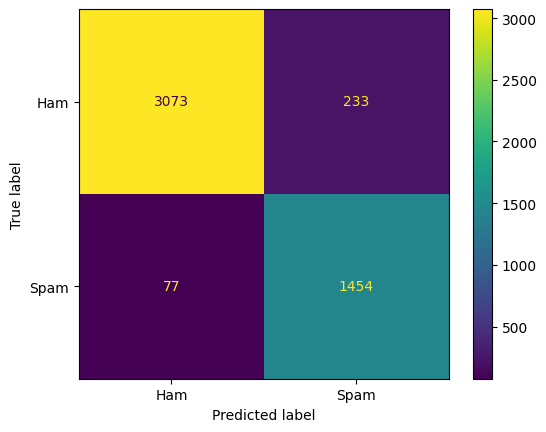

In [7]:
matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,model.predict(cv.transform(x_test))),display_labels=['Ham','Spam'])
matrix.plot()

Measure accuracy of the model

In [8]:
model.score(cv.transform(x_test),y_test)
print("{:.2%}".format(metrics.accuracy_score(model.predict(cv.transform(x_test)),y_test)))

93.59%


You can enter email text here and the model will predict if it is spam or not.

In [9]:
testEmail = input("Enter the email text: ")
prediction = model.predict(cv.transform([testEmail]))
if prediction[0] == 1:
    print("This email is spam.")
else:
    print("This email is not spam.")

This email is spam.
